# Importing the necessary libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data set

Download the data set from: https://www.kaggle.com/gilsousa/habermans-survival-data-set

In [3]:
haberman = pd.read_csv("haberman.csv")

In [4]:
print(haberman.shape)

(306, 4)


In [5]:
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


Number of Attributes/Features: 4 (including the class attribute)

Attribute/Features Information:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

 To read about $\textbf{axillary lymph nodes}$ follow the link : https://en.wikipedia.org/wiki/Axillary_lymph_nodes

In [39]:
haberman['status']=haberman['status'].map({2:"NO",1:'YES'})

In [40]:
haberman["status"].value_counts()

YES    225
NO      81
Name: status, dtype: int64

# 1-d Scatter Plot

In [49]:
alive = haberman.loc[haberman['status'] == 'YES']
died = haberman.loc[haberman['status'] == 'NO']

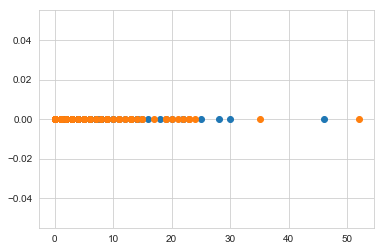

In [50]:
plt.plot(alive["nodes"], np.zeros_like(alive['nodes']), 'o')
plt.plot(died["nodes"], np.zeros_like(died['nodes']), 'o')
plt.show()

## Observations

- The two classes overlap highly.
- We must plot differently.

# 2-D Scatter Plot

We plot 2-d scatter plots between each pair of features below:

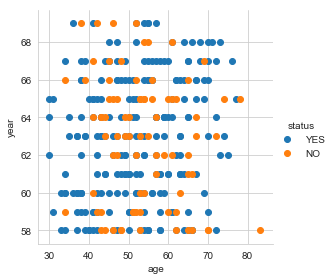

In [63]:
# Between 'age' & 'year'

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend()
plt.show()

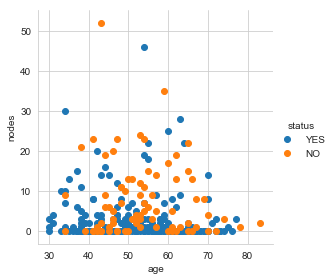

In [64]:
# Between 'age' & 'nodes'

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend()
plt.show()

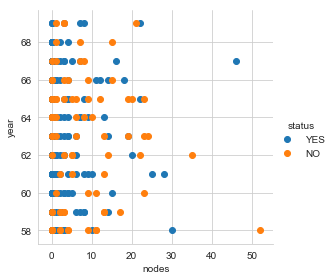

In [65]:
# Between 'nodes' & 'year'

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "nodes", "year") \
   .add_legend()
plt.show()

## Observations

- We cannot classify the two classes as they both are quite jumbled up.
- We should come up with other plots between the various features in the set.

# Pair Plots

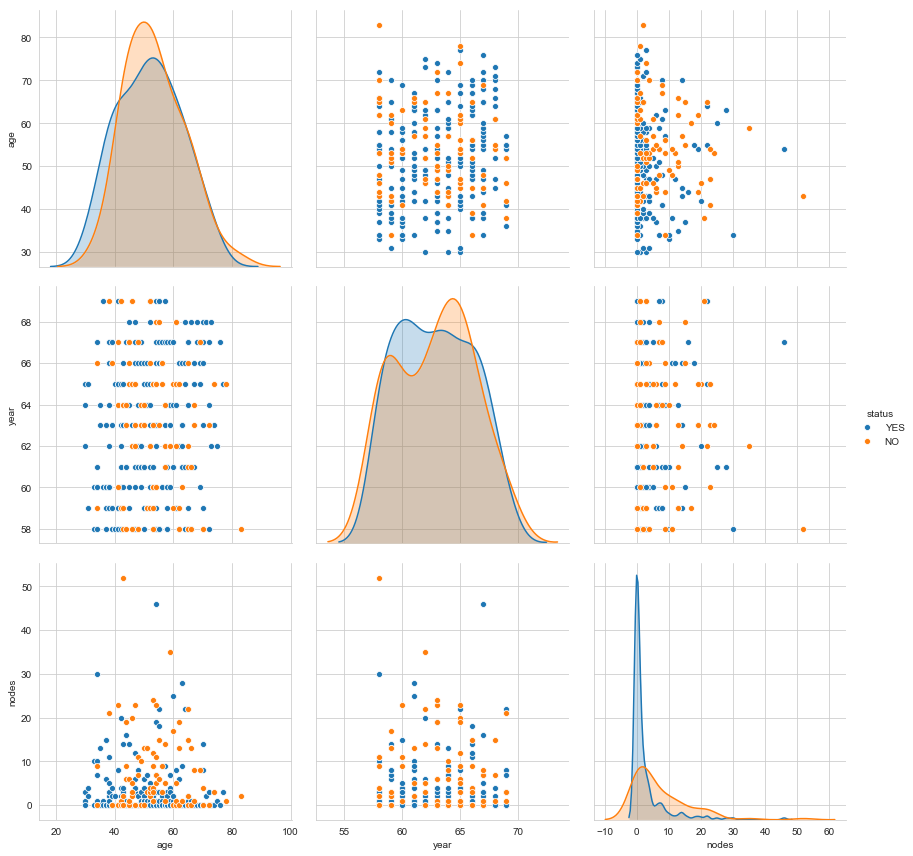

In [70]:
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", height=4);
plt.show()

## Observations

- We cannot classify the two classes as they both are quite jumbled up.
- We should come up with other plots between the various features in the set.

# Histograms and PDF(s)

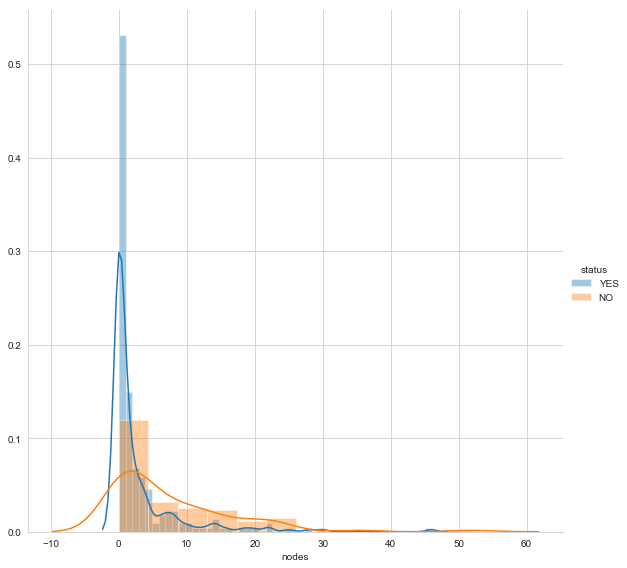

In [43]:
# Of 'nodes'

sns.FacetGrid(haberman, hue="status", height=8) \
   .map(sns.distplot, "nodes") \
   .add_legend()
plt.show()

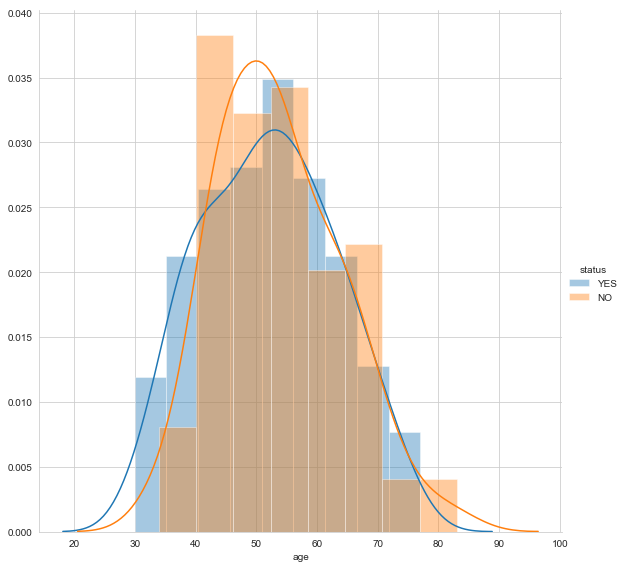

In [44]:
# Of 'age'

sns.FacetGrid(haberman, hue="status", height=8) \
   .map(sns.distplot, "age") \
   .add_legend()
plt.show()

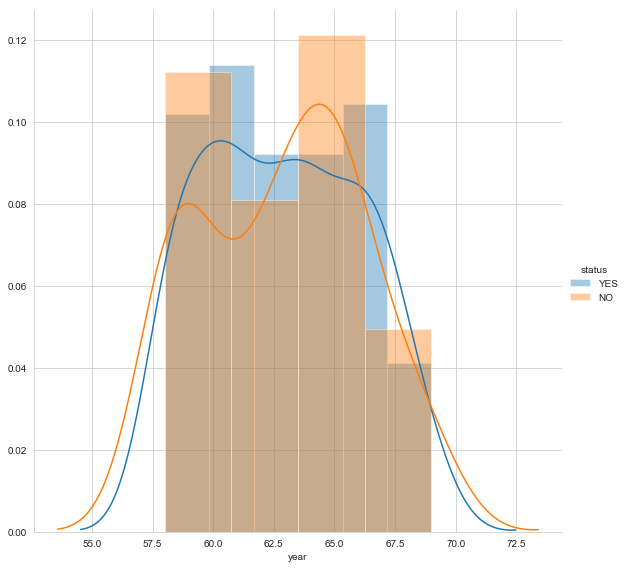

In [46]:
# Of 'year'

sns.FacetGrid(haberman, hue="status", height=8) \
   .map(sns.distplot, "year") \
   .add_legend()
plt.show()

# Cumulative Density Function

[ 0.83555556  0.08        0.02222222  0.02666667  0.01777778  0.00444444
  0.00888889  0.          0.          0.00444444]
[  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]
[ 0.56790123  0.14814815  0.13580247  0.04938272  0.07407407  0.
  0.01234568  0.          0.          0.01234568]
[  0.    5.2  10.4  15.6  20.8  26.   31.2  36.4  41.6  46.8  52. ]


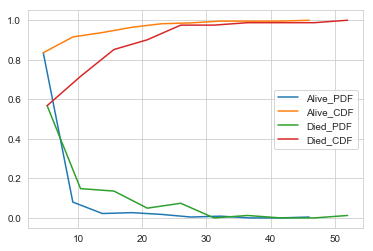

In [66]:
# CDF of 'nodes'

counts, bin_edges = np.histogram(alive['nodes'], bins=10, 
                                 density = True)
# Alive
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend('status')
plt.legend(['Alive_PDF', 'Alive_CDF','Died_PDF', 'Died_CDF'])

# Died
counts, bin_edges = np.histogram(died['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend('status')
plt.legend(['Alive_PDF', 'Alive_CDF','Died_PDF', 'Died_CDF'])

[ 0.05333333  0.10666667  0.12444444  0.09333333  0.16444444  0.16444444
  0.09333333  0.11111111  0.06222222  0.02666667]
[ 30.   34.7  39.4  44.1  48.8  53.5  58.2  62.9  67.6  72.3  77. ]
[ 0.03703704  0.12345679  0.19753086  0.19753086  0.13580247  0.12345679
  0.09876543  0.04938272  0.02469136  0.01234568]
[ 34.   38.9  43.8  48.7  53.6  58.5  63.4  68.3  73.2  78.1  83. ]


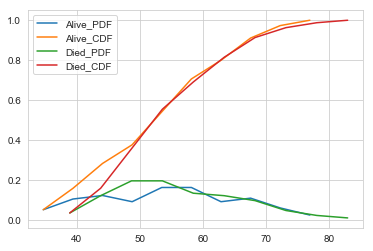

In [67]:
# CDF of 'age'

counts, bin_edges = np.histogram(alive['age'], bins=10, 
                                 density = True)
# Alive
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend('status')
plt.legend(['Alive_PDF', 'Alive_CDF','Died_PDF', 'Died_CDF'])

# Died
counts, bin_edges = np.histogram(died['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend('status')
plt.legend(['Alive_PDF', 'Alive_CDF','Died_PDF', 'Died_CDF'])

[ 0.18666667  0.10666667  0.10222222  0.07111111  0.09777778  0.10222222
  0.06666667  0.09777778  0.09333333  0.07555556]
[ 58.   59.1  60.2  61.3  62.4  63.5  64.6  65.7  66.8  67.9  69. ]
[ 0.25925926  0.04938272  0.03703704  0.08641975  0.09876543  0.09876543
  0.16049383  0.07407407  0.04938272  0.08641975]
[ 58.   59.1  60.2  61.3  62.4  63.5  64.6  65.7  66.8  67.9  69. ]


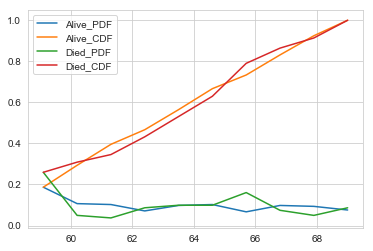

In [69]:
# CDF of 'year'

counts, bin_edges = np.histogram(alive['year'], bins=10, 
                                 density = True)
# Alive
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend('status')
plt.legend(['Alive_PDF', 'Alive_CDF','Died_PDF', 'Died_CDF'])

# Died
counts, bin_edges = np.histogram(died['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend('status')
plt.legend(['Alive_PDF', 'Alive_CDF','Died_PDF', 'Died_CDF'])

## Observations

- We cannot classify the two classes as they both are quite jumbled up.
- We should come up with other plots between the various features in the set.

# Box Plots

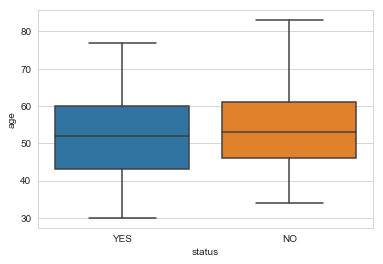

In [71]:
# Of age
sns.boxplot(x = 'status', y = 'age', data = haberman)
plt.show()

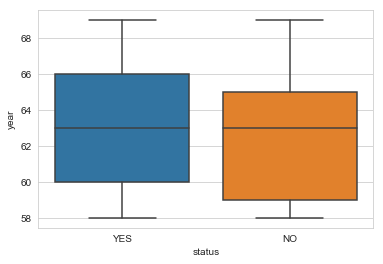

In [72]:
# Of year
sns.boxplot(x = 'status', y = 'year', data = haberman)
plt.show()

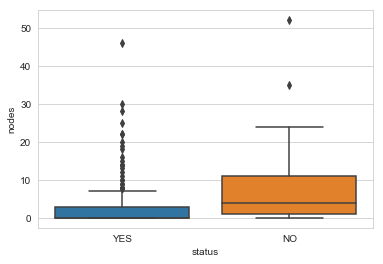

In [73]:
# Of nodes
sns.boxplot(x = 'status', y = 'nodes', data = haberman)
plt.show()

# Violin Plots

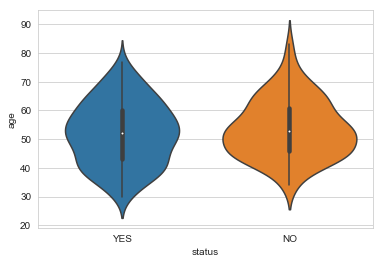

In [74]:
# Of age
sns.violinplot(x = 'status', y = 'age', data = haberman, height = 8)
plt.show()

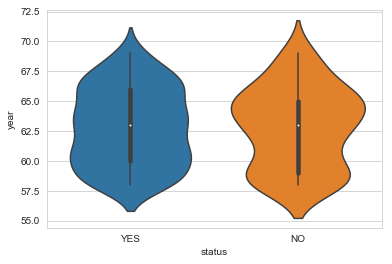

In [75]:
# Of year
sns.violinplot(x = 'status', y = 'year', data = haberman, height = 8)
plt.show()

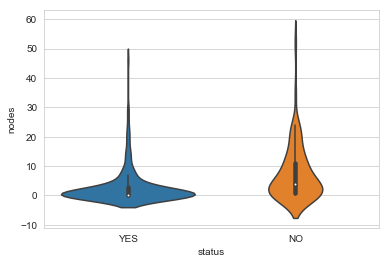

In [76]:
# Of nodes
sns.violinplot(x = 'status', y = 'nodes', data = haberman, height = 8)
plt.show()

## Observations

- We cannot classify the two classes as they both are quite jumbled up.
- We should come up with other plots between the various features in the set.

# Statistics of the data set

In [77]:
haberman.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


# Conclusion

- The data set does not have enough features to get good insights into the data